In [1]:
import re
import os

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

## Load Clean Data

In [3]:
# read accepted_processed csv
accepted_processed = pd.read_csv('accepted_processed.csv')

In [4]:
accepted_processed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term,grade,emp_length,MORTGAGE,OTHER,OWN,RENT,verification_status,car,credit_card,debt_consolidation,housing,major_purchase,medical,other,small_business,vacation,initial_list_status,application_type,disbursement_method,debt_settlement_flag,loan_status,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,0.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,36,2.0,10.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0.0,2019,1,2019,3,2003,8
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,36,2.0,10.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0.0,2016,6,2019,3,1999,12
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,60,1.0,10.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0.0,2017,6,2019,3,2000,8
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,60,2.0,10.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0.0,2019,2,2019,3,2008,9
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,60,5.0,3.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1,0,0.0,2016,7,2018,3,1998,6


In [5]:
# sum of null values 
accepted_processed.isnull().sum().sum()

0

In [6]:
accepted_processed.shape

(1756089, 94)

In [7]:
# sum of null values 
accepted_processed.isnull().sum().sum()

0

In [8]:
accepted_processed.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
last_fico_ra

## Logistic Regression

### Train, Validation, Test Splits

In [9]:
# import Train Test Split
from sklearn.model_selection import train_test_split

# Instantiate X and y
X = accepted_processed.drop('loan_status', axis=1)
y = accepted_processed['loan_status']

# Remainder Test Split
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

# Valudation Train Split
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

### Scale the Data

In [10]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# instantiate, fit, transform standard scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)

X_val_ss = ss.transform(X_val)

### Model

In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate and fit Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_ss, y_train)

# Evaluate the model
print(f'The train accuracy is: {log_reg.score(X_train_ss, y_train)}')
print(f'The Validation accuracy is: {log_reg.score(X_val_ss, y_val)}')

The train accuracy is: 0.8802418305748436
The Validation accuracy is: 0.879025228765713


In [13]:
# Import PCA, LogisticRegression, and Accuracy Score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# range of n_components
n_components = np.arange(1, 94, 1)

# Create empty list for train and test accuracy and runtime
train_accuracy = []
test_accuracy = []

# Loop through n_components and fit PCA
for n in n_components:
    
    # print which component is being fit
    print(f'Fitting PCA with {n} components')
    
    # Instantiate and fit PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_ss)
    X_val_pca = pca.transform(X_val_ss)
    
    # Instantiate and fit PCA data to Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train_pca, y_train)
    
    # Evaluate the model
    train_accuracy.append(log_reg.score(X_train_pca, y_train))
    test_accuracy.append(log_reg.score(X_val_pca, y_val))

Fitting PCA with 1 components
Fitting PCA with 2 components
Fitting PCA with 3 components
Fitting PCA with 4 components
Fitting PCA with 5 components
Fitting PCA with 6 components
Fitting PCA with 7 components
Fitting PCA with 8 components
Fitting PCA with 9 components
Fitting PCA with 10 components
Fitting PCA with 11 components
Fitting PCA with 12 components
Fitting PCA with 13 components
Fitting PCA with 14 components
Fitting PCA with 15 components
Fitting PCA with 16 components
Fitting PCA with 17 components
Fitting PCA with 18 components
Fitting PCA with 19 components
Fitting PCA with 20 components
Fitting PCA with 21 components
Fitting PCA with 22 components
Fitting PCA with 23 components
Fitting PCA with 24 components
Fitting PCA with 25 components
Fitting PCA with 26 components
Fitting PCA with 27 components
Fitting PCA with 28 components
Fitting PCA with 29 components
Fitting PCA with 30 components
Fitting PCA with 31 components
Fitting PCA with 32 components
Fitting PCA with 

In [14]:
expl_var = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(expl_var)
cumulative_sum

array([0.11831059, 0.18986522, 0.2553821 , 0.29768049, 0.33978896,
       0.37509335, 0.40375705, 0.4310544 , 0.45641484, 0.47844562,
       0.49888919, 0.51879871, 0.53605973, 0.55316965, 0.56880942,
       0.5836807 , 0.5972894 , 0.6105402 , 0.62346543, 0.6361042 ,
       0.6483108 , 0.65998819, 0.67140779, 0.68257918, 0.69362656,
       0.70456768, 0.71544425, 0.7263055 , 0.73713611, 0.74789274,
       0.75861185, 0.7692917 , 0.77979256, 0.79014581, 0.80026897,
       0.81021653, 0.82013319, 0.82984872, 0.83923509, 0.84830301,
       0.85718376, 0.86600906, 0.87464362, 0.88291128, 0.89081666,
       0.89860682, 0.90622451, 0.91363692, 0.92050122, 0.92710168,
       0.93345468, 0.93928817, 0.94494852, 0.95049057, 0.95542696,
       0.96010227, 0.96474764, 0.96890467, 0.97229433, 0.9755314 ,
       0.97837598, 0.9807386 , 0.98307136, 0.98533128, 0.98734966,
       0.98885184, 0.99021573, 0.99150761, 0.99264757, 0.99373345,
       0.99471395, 0.99558745, 0.99635466, 0.99700775, 0.99761

### Evaluate

/var/folders/24/01k76k4d1m97wq2ctswkkkt40000gn/T/ipykernel_30297/1862869275.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/var/folders/24/01k76k4d1m97wq2ctswkkkt40000gn/T/ipykernel_30297/1862869275.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


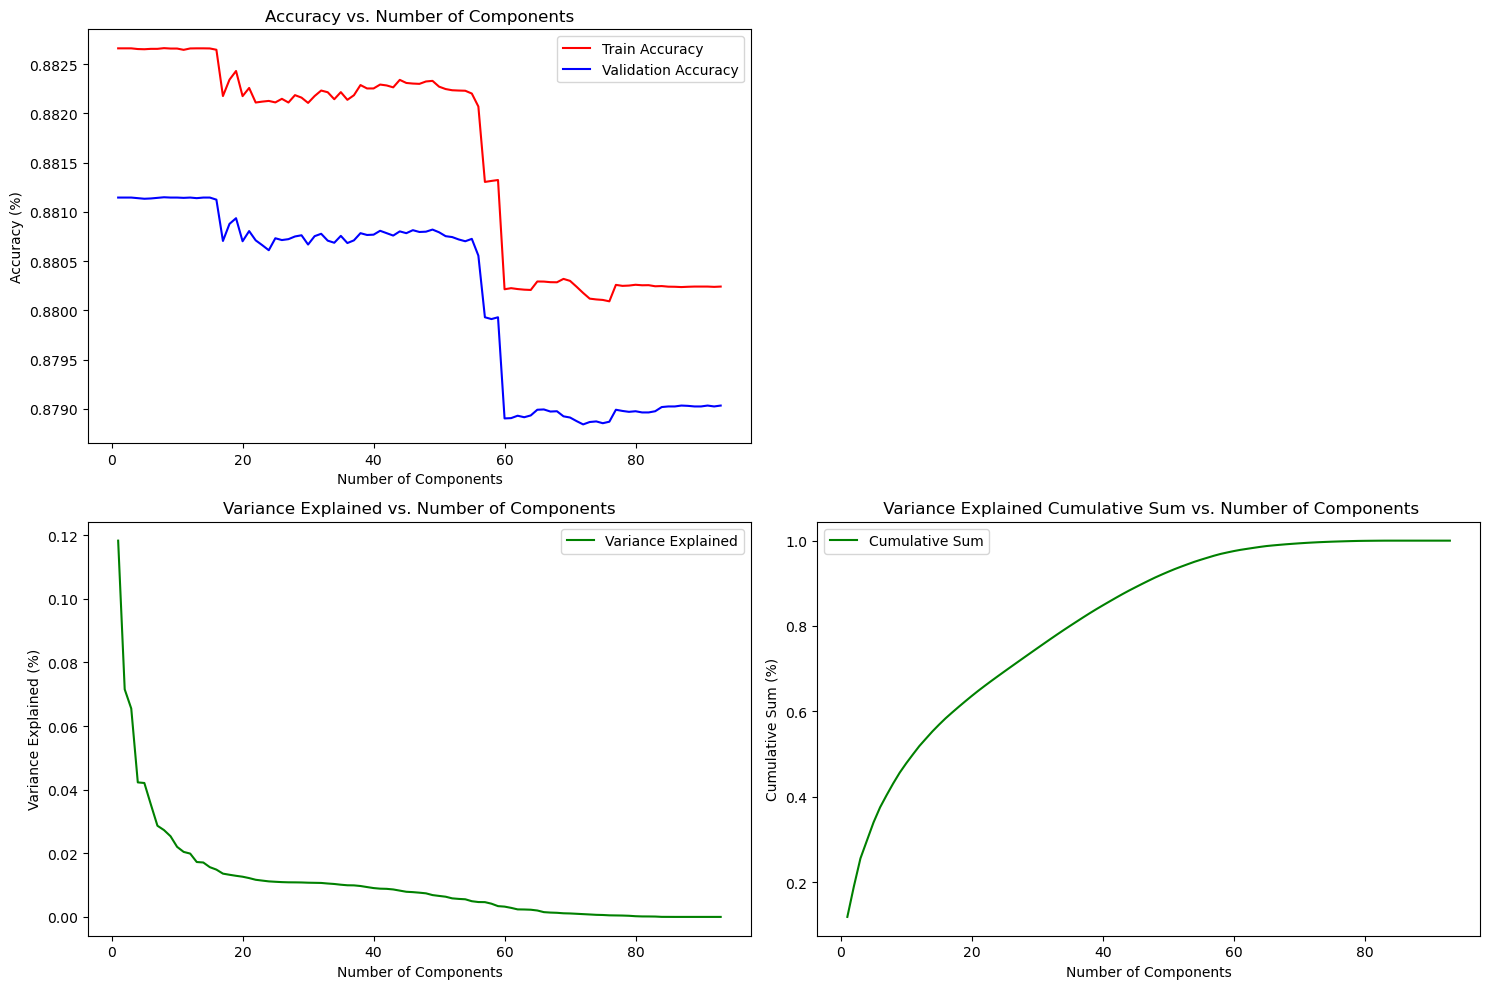

In [15]:
# Create three subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

# Accuracy vs. Number of Components
plt.subplot(2, 2, 1)
plt.plot(n_components, train_accuracy, label='Train Accuracy', color='red')
plt.plot(n_components, test_accuracy, label='Validation Accuracy', color='blue')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.legend()

# Variance Explained vs. Number of Components
plt.subplot(2, 2, 3)
plt.plot(n_components, expl_var, label='Variance Explained', color='green')
plt.title('Variance Explained vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)')
plt.legend()

# Cumulative Sum vs. Number of Components
plt.subplot(2, 2, 4)
plt.plot(n_components, cumulative_sum, label='Cumulative Sum', color='green')
plt.title(' Variance Explained Cumulative Sum vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum (%)')
plt.legend()

plt.tight_layout()
plt.show()

### Confusion Matrix

In [16]:
# import classification report
from sklearn.metrics import classification_report

# show classification report
print(classification_report(y_val, log_reg.predict(X_val_pca)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94    290132
         1.0       0.28      0.01      0.02     39135

    accuracy                           0.88    329267
   macro avg       0.58      0.50      0.48    329267
weighted avg       0.81      0.88      0.83    329267



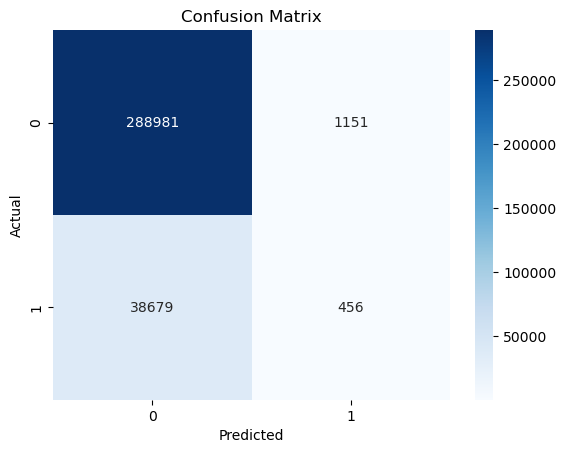

In [17]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# show heatmap confusion matrix
sns.heatmap(confusion_matrix(y_val, log_reg.predict(X_val_pca)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Downsample to 60/40

In [18]:
# distribution of loan status
accepted_processed['loan_status'].value_counts()

0.0    1549364
1.0     206725
Name: loan_status, dtype: int64

In [19]:
# distribution of loan status percentages
accepted_processed['loan_status'].value_counts(normalize=True)

0.0    0.882281
1.0    0.117719
Name: loan_status, dtype: float64

To downsample where 40% of our data is class 1, we can multiply the number of observations in class 1 by 1.5 and get the corresponding amount we need in class 0. 

In [20]:
class1 = 206725
class0 = class1 * 1.5
print(class0)
print(class0 / (class1 + class0))
print(class1 / (class1 + class0))

310087.5
0.6
0.4


In [21]:
# import resample
from sklearn.utils import resample

# sample 60% of class 1 and 100% of class 0
accepted_sample = resample(accepted_processed[accepted_processed['loan_status'] == 0], replace=True, n_samples=310087, random_state=1)

# concatenate class 0 and class 1
accepted_sample = pd.concat([accepted_processed[accepted_processed['loan_status'] == 1], accepted_sample])

# distribution of loan status
print(accepted_sample['loan_status'].value_counts())
print(accepted_sample['loan_status'].value_counts(normalize=True))

0.0    310087
1.0    206725
Name: loan_status, dtype: int64
0.0    0.6
1.0    0.4
Name: loan_status, dtype: float64


In [22]:
accepted_sample.shape

(516812, 94)

## Accepted Sample Data to CSV

In [23]:
# accepted sample to csv
accepted_sample.to_csv('accepted_sample.csv', index=False)

In [24]:
# read accepted_sample csv
accepted_sample = pd.read_csv('accepted_sample.csv')

## Logistic Regression

In [25]:
# import Train Test Split
from sklearn.model_selection import train_test_split

# Instantiate X and y
X = accepted_sample.drop('loan_status', axis=1)
y = accepted_sample['loan_status']

# Remainder Test Split
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

# Valudation Train Split
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

### Scale the Data

In [26]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# instantiate, fit, transform standard scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_val_ss = ss.transform(X_val)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Instantiate and fit Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_ss, y_train)

# Evaluate the model
print(f'The train accuracy is: {log_reg.score(X_train_ss, y_train)}')
print(f'The Validation accuracy is: {log_reg.score(X_val_ss, y_val)}')

The train accuracy is: 0.6803849937737784
The Validation accuracy is: 0.6802369379688967


In [28]:
# Import PCA, LogisticRegression, and Accuracy Score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# range of n_components
n_components = np.arange(1, 94, 1)

# Create empty list for train and test accuracy and runtime
train_accuracy = []
test_accuracy = []

# Loop through n_components and fit PCA
for n in n_components:
    
    # print progess 
    print(f'Fitting PCA with {n} components')
    
    # Instantiate and fit PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_ss)
    X_val_pca = pca.transform(X_val_ss)
    
    # Instantiate and fit PCA data to Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train_pca, y_train)
    
    
    # Evaluate the model
    train_accuracy.append(log_reg.score(X_train_pca, y_train))
    test_accuracy.append(log_reg.score(X_val_pca, y_val))

Fitting PCA with 1 components
Fitting PCA with 2 components
Fitting PCA with 3 components
Fitting PCA with 4 components
Fitting PCA with 5 components
Fitting PCA with 6 components
Fitting PCA with 7 components
Fitting PCA with 8 components
Fitting PCA with 9 components
Fitting PCA with 10 components
Fitting PCA with 11 components
Fitting PCA with 12 components
Fitting PCA with 13 components
Fitting PCA with 14 components
Fitting PCA with 15 components
Fitting PCA with 16 components
Fitting PCA with 17 components
Fitting PCA with 18 components
Fitting PCA with 19 components
Fitting PCA with 20 components
Fitting PCA with 21 components
Fitting PCA with 22 components
Fitting PCA with 23 components
Fitting PCA with 24 components
Fitting PCA with 25 components
Fitting PCA with 26 components
Fitting PCA with 27 components
Fitting PCA with 28 components
Fitting PCA with 29 components
Fitting PCA with 30 components
Fitting PCA with 31 components
Fitting PCA with 32 components
Fitting PCA with 

In [29]:
expl_var = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(expl_var)
cumulative_sum

array([0.11900025, 0.19126301, 0.25558817, 0.29777941, 0.33854196,
       0.37412158, 0.40316566, 0.43044291, 0.45586011, 0.47784888,
       0.49820284, 0.51833664, 0.53573446, 0.55277227, 0.56849355,
       0.58333505, 0.59682348, 0.61013486, 0.62279588, 0.63537608,
       0.64757696, 0.65929692, 0.67069517, 0.68187262, 0.69292494,
       0.70387898, 0.71477157, 0.72562702, 0.73645872, 0.74723365,
       0.75798732, 0.76866791, 0.77915347, 0.78954336, 0.79975153,
       0.80970365, 0.81950875, 0.82921257, 0.83855178, 0.84765955,
       0.8565047 , 0.86518022, 0.87373578, 0.88219829, 0.89019391,
       0.89793279, 0.90539313, 0.91274384, 0.91963212, 0.92629031,
       0.93253215, 0.93837409, 0.9440646 , 0.94959518, 0.95458873,
       0.95940715, 0.96403408, 0.9682431 , 0.9716369 , 0.97495377,
       0.9777975 , 0.98020308, 0.98255134, 0.98482514, 0.98697662,
       0.98851008, 0.98984608, 0.99101786, 0.99215893, 0.99329421,
       0.9943333 , 0.99535422, 0.99614454, 0.99684543, 0.99749

### Evaluate

/var/folders/24/01k76k4d1m97wq2ctswkkkt40000gn/T/ipykernel_30297/1862869275.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/var/folders/24/01k76k4d1m97wq2ctswkkkt40000gn/T/ipykernel_30297/1862869275.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


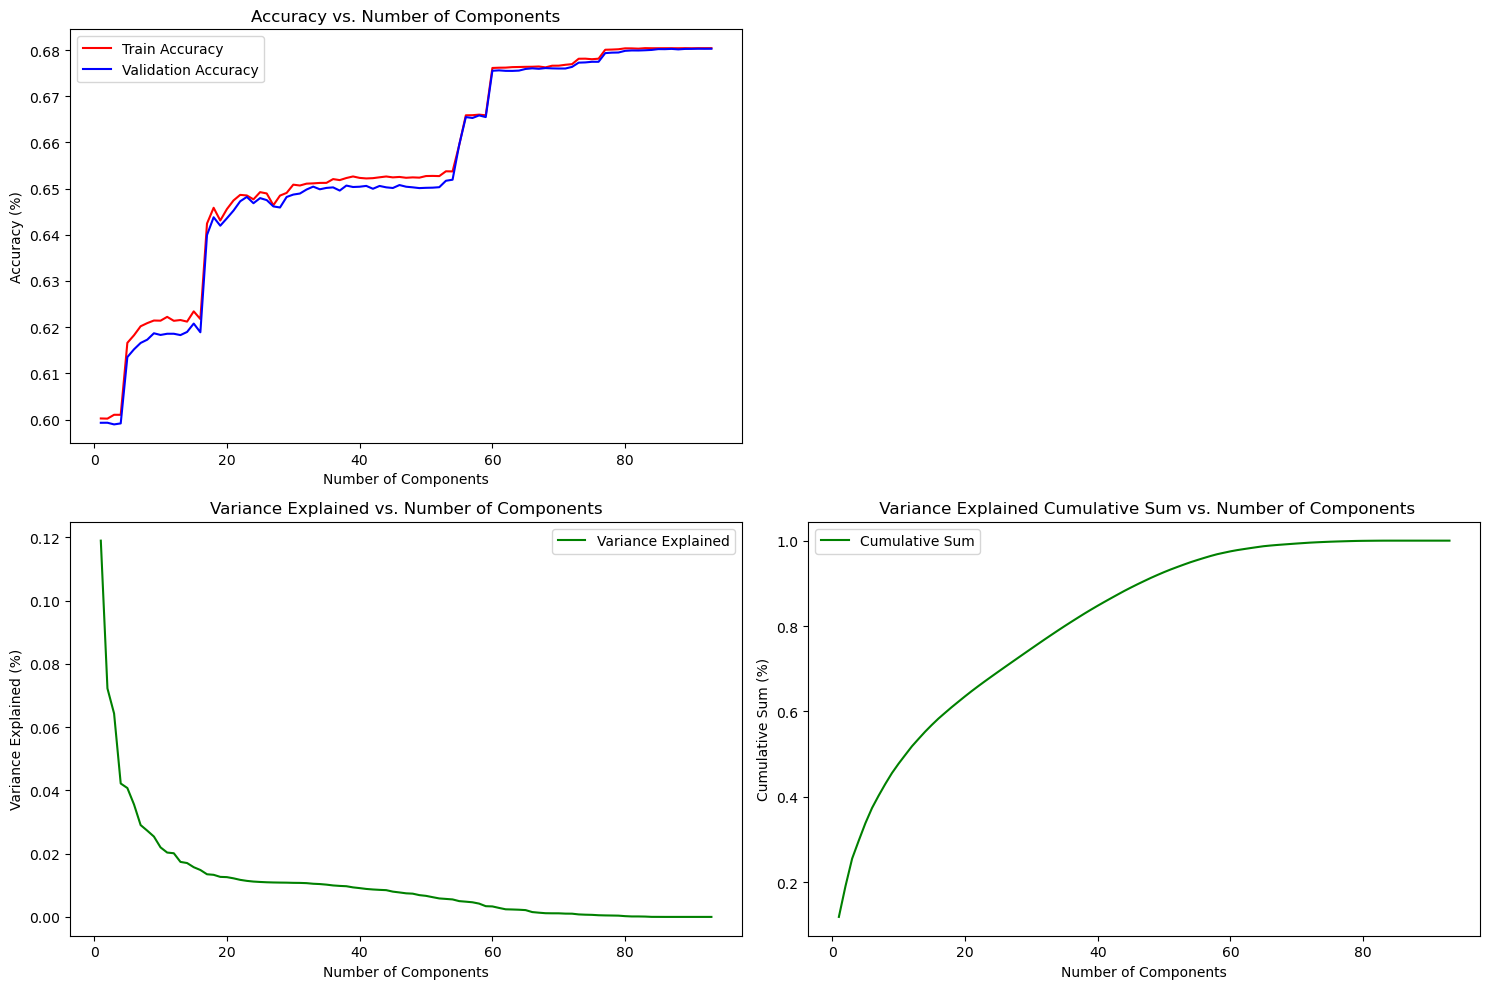

In [30]:
# Create three subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

# Accuracy vs. Number of Components
plt.subplot(2, 2, 1)
plt.plot(n_components, train_accuracy, label='Train Accuracy', color='red')
plt.plot(n_components, test_accuracy, label='Validation Accuracy', color='blue')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.legend()

# Variance Explained vs. Number of Components
plt.subplot(2, 2, 3)
plt.plot(n_components, expl_var, label='Variance Explained', color='green')
plt.title('Variance Explained vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)')
plt.legend()

# Cumulative Sum vs. Number of Components
plt.subplot(2, 2, 4)
plt.plot(n_components, cumulative_sum, label='Cumulative Sum', color='green')
plt.title(' Variance Explained Cumulative Sum vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum (%)')
plt.legend()

plt.tight_layout()
plt.show()

### Confusion Matrix

In [31]:
# import classification report
from sklearn.metrics import classification_report

# show classification report
print(classification_report(y_val, log_reg.predict(X_val_pca)))

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.75     58075
         1.0       0.62      0.53      0.57     38828

    accuracy                           0.68     96903
   macro avg       0.67      0.66      0.66     96903
weighted avg       0.67      0.68      0.68     96903



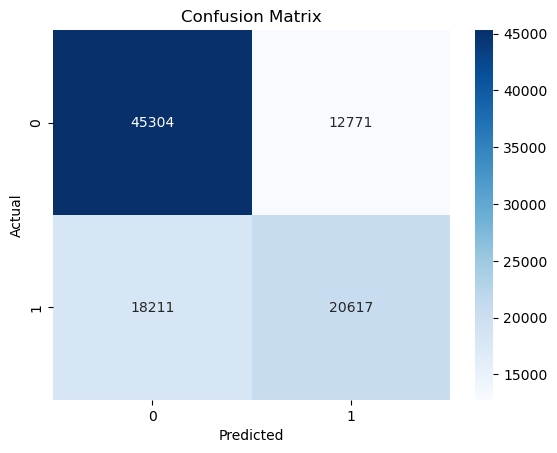

In [32]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# show heatmap confusion matrix
sns.heatmap(confusion_matrix(y_val, log_reg.predict(X_val_pca)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 88% to 68%


Class 1:
- Recall: 1% to 53%
- Precision: 28% to 62%


Class 0:
- Recall: 100% to 78%
- Precision: 88% to 71%

## K Nearest Neighbors Classifer

In [33]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train_ss, y_train)

# Evaluate the model
print(f'The train accuracy is: {knn.score(X_train_ss, y_train)}')
print(f'The Validation accuracy is: {knn.score(X_val_ss, y_val)}')

The train accuracy is: 0.7621411322779715
The Validation accuracy is: 0.6315800336418893


Overfitting, we need to test a range of neighbors as well as use PCA

In [ ]:
# import grid search, min max scaler, and pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# estimator
estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_red', PCA()),
    ('knn', KNeighborsClassifier())
])

# parameters
params = {
    'scaler': [StandardScaler()],
    'dim_red__n_components': np.arange(10, 50, 5),
    'knn__n_neighbors': np.arange(1, 51, 5)
}

# grid search
grid = GridSearchCV(estimator, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_rem, y_rem)

In [ ]:
# Create four subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy vs. Number of Components
plt.subplot(2, 2, 1)
plt.plot(grid.cv_results_['param_dim_red__n_components'], grid.cv_results_['mean_train_score'], label='Train Accuracy', color='red')
plt.plot(grid.cv_results_['param_dim_red__n_components'], grid.cv_results_['mean_test_score'], label='Validation Accuracy', color='blue')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.legend()

# Accuracy vs. Number of Neighbors
plt.subplot(2, 2, 2)
plt.plot(grid.cv_results_['param_knn__n_neighbors'], grid.cv_results_['mean_train_score'], label='Train Accuracy', color='red')
plt.plot(grid.cv_results_['param_knn__n_neighbors'], grid.cv_results_['mean_test_score'], label='Validation Accuracy', color='blue')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')
plt.legend()

# Variance Explained vs. Number of Components
plt.subplot(2, 2, 3)
plt.plot(grid.cv_results_['param_dim_red__n_components'], grid.cv_results_['param_dim_red__explained_variance_ratio_'], label='Variance Explained', color='green')
plt.title('Variance Explained vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)')
plt.legend()

# Cumulative Sum vs. Number of Components
plt.subplot(2, 2, 4)
plt.plot(grid.cv_results_['param_dim_red__n_components'], grid.cv_results_['param_dim_red__explained_variance_ratio_'].cumsum(), label='Cumulative Sum', color='green')
plt.title(' Variance Explained Cumulative Sum vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum (%)')
plt.legend()

In [ ]:
# best parameters
grid.best_params_

In [ ]:
# Instantiate and fit PCA with best parameters
pca = PCA(n_components=grid.best_params_['dim_red__n_components'])
X_train_pca = pca.fit_transform(X_train_ss)
X_val_pca = pca.transform(X_val_ss)

# Instantiate and fit KNN with best parameters
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['knn__n_neighbors'])
knn.fit(X_train_pca, y_train)

# Evaluate the model
print(f'The train accuracy is: {knn.score(X_train_pca, y_train)}')
print(f'The Validation accuracy is: {knn.score(X_val_pca, y_val)}')